# Entregável 1 - visão computacional

In [20]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.2.0 


# Equalização de histograma

In [21]:
rintin = cv2.imread("RinTinTin.jpg")

In [22]:
rintin.shape

(240L, 320L, 3L)

In [23]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [24]:
rintin_gray.shape

(240L, 320L)

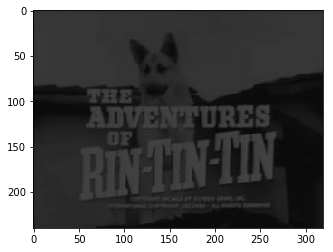

In [25]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

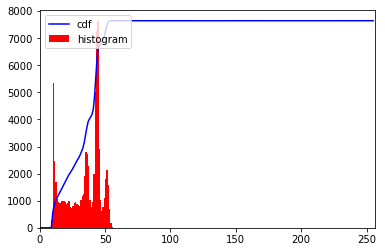

In [26]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

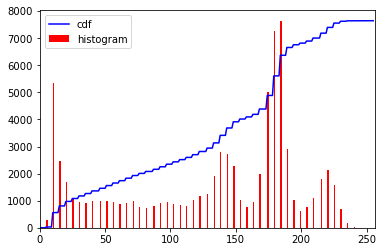

In [27]:
min=20
max=0

lista=[]

for i in range(len(rintin_gray)):
    for j in range(len(rintin_gray[i])):
        rintin_gray[i][j] = (rintin_gray[i][j]-8)*5.12
    
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
    
plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

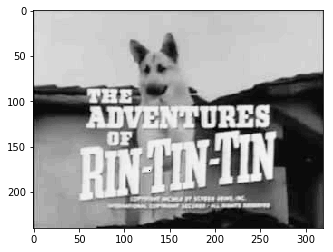

In [28]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [29]:
grid = cv2.imread("hall_box_battery1.jpg")
grid_rgb = cv2.cvtColor(grid, cv2.COLOR_BGR2RGB)
#plt.imshow(grid_rgb,interpolation="none")

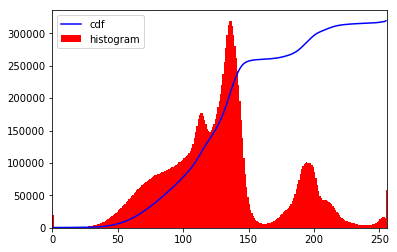

In [30]:
grid_r = grid_rgb[:,:,0]
grid_b = grid_rgb[:,:,2]

hist,bins = np.histogram(grid_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(grid_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

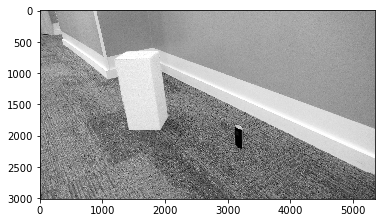

In [31]:
plt.imshow(grid_r, cmap='Greys_r')

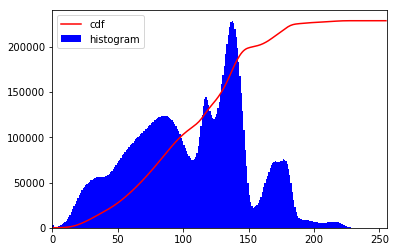

In [32]:
hist,bins = np.histogram(grid_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'r')
plt.hist(grid_b.flatten(),256,[0,256], color = 'b')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

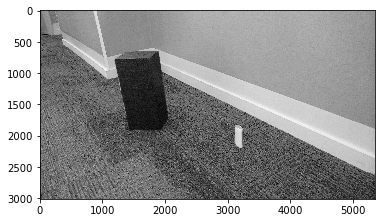

In [33]:
plt.imshow(grid_b, cmap='Greys_r')

Tanto o azul quanto o vermelho possuem uma área cinza que predomina na parcela do meio do histograma. Os valores mais no final que indicam a presença da caixa (no vermelho) ou da bateria (no azul). Porém, junto com esses objetos está presente também a faixa branca na parede (pois o branco contém todas as outras cores). Assim, não é possível encontrar os objetos no histograma.

In [34]:
img = grid_r - 0.8*grid_b

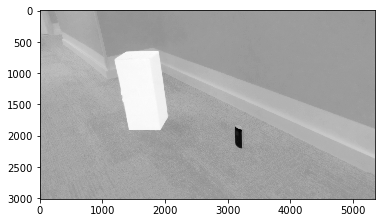

In [35]:
plt.imshow(img,cmap='Greys_r')

In [36]:
img.shape

(3006L, 5344L)

In [37]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] < 100:
            img[i][j] = 0

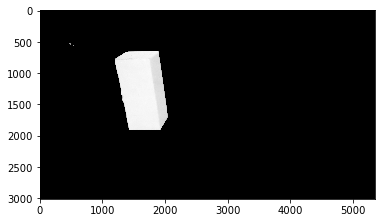

In [38]:
plt.imshow(img,cmap='Greys_r')